In [1]:
# Let's import Scikit-learn dataset module
from sklearn import datasets

In [2]:
dataset = datasets.load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# first row of dataset
print("Data from first row:", dataset.data[:1])
print("Number of features:", len(dataset.data[:1][0]))

# first row of dataset target
print("Target for first row data:", dataset.target[:1])

Data from first row: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
Number of features: 30
Target for first row data: [0]


In [6]:
from sklearn import linear_model
linear_reg_classifier = linear_model.LinearRegression()
linear_reg_classifier.fit(dataset.data[:100,25:], dataset.target[:100])

LinearRegression()

In [7]:
print(dataset.data[10,25:])

[0.1551  0.1459  0.09975 0.2948  0.08452]


In [8]:
import numpy as np
x = np.array([[0.1551, 0.1459, 0.09975, 0.2948, 0.08452]])
linear_reg_classifier.predict(x)

array([0.59073061])

In [9]:
from sklearn import linear_model
logit_classifier = linear_model.LogisticRegression()
logit_classifier.fit(dataset.data[:100,25:], dataset.target[:100])

LogisticRegression()

In [10]:
print(dataset.data[10,25:])

[0.1551  0.1459  0.09975 0.2948  0.08452]


In [11]:
import numpy as np
x = np.array([[0.1551, 0.1459, 0.09975, 0.2948, 0.08452]])
logit_classifier.predict(x)

array([1])

In [12]:
predictions = logit_classifier.predict(dataset.data[:,25:])
accuracy = 100.0 * (dataset.target == predictions).sum() / dataset.data.shape[0]
print(accuracy)

76.44991212653778


Original model accuracy: 85.41%
Indices of top 5 features: [4 3 0 2 1]
Top 5 feature names: [np.str_('mean smoothness'), np.str_('mean area'), np.str_('mean radius'), np.str_('mean perimeter'), np.str_('mean texture')]
Top 5 features model accuracy: 91.21%


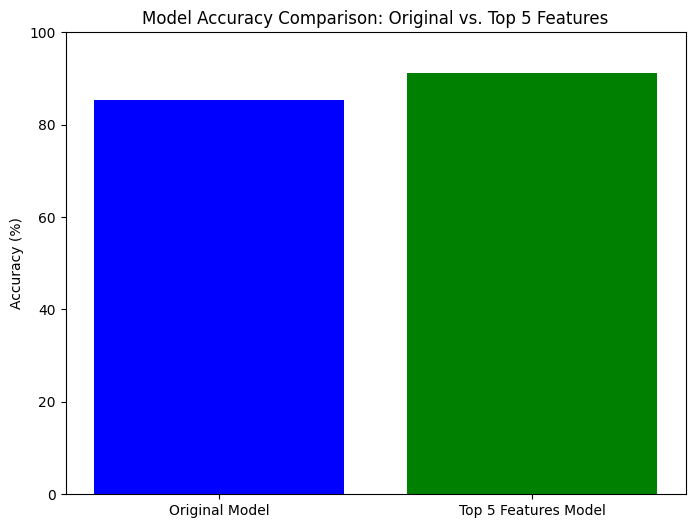

In [13]:
from sklearn import datasets
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = datasets.load_breast_cancer()

# Original model training
logit_classifier = linear_model.LogisticRegression()
logit_classifier.fit(dataset.data[:, 25:], dataset.target)

# Calculate original accuracy
predictions_original = logit_classifier.predict(dataset.data[:, 25:])
accuracy_original = 100.0 * (dataset.target == predictions_original).sum() / dataset.data.shape[0]
print(f"Original model accuracy: {accuracy_original:.2f}%")

# Extract feature importance (coefficients)
feature_importance = np.abs(logit_classifier.coef_[0])

# Get indices of top 5 features
top_5_feature_indices = np.argsort(feature_importance)[-5:]
print(f"Indices of top 5 features: {top_5_feature_indices}")

# Get the names of the top 5 features
top_5_feature_names = [dataset.feature_names[i] for i in top_5_feature_indices]
print(f"Top 5 feature names: {top_5_feature_names}")

# Train a new model using only the top 5 features
logit_classifier_top5 = linear_model.LogisticRegression()
logit_classifier_top5.fit(dataset.data[:, top_5_feature_indices], dataset.target)

# Calculate accuracy for the new model
predictions_top5 = logit_classifier_top5.predict(dataset.data[:, top_5_feature_indices])
accuracy_top5 = 100.0 * (dataset.target == predictions_top5).sum() / dataset.data.shape[0]
print(f"Top 5 features model accuracy: {accuracy_top5:.2f}%")

# Visualize results
labels = ['Original Model', 'Top 5 Features Model']
accuracies = [accuracy_original, accuracy_top5]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison: Original vs. Top 5 Features')
plt.ylim(0, 100)
plt.show()